### Import Libraries

In [1]:
from numpy import arange, argmax, asarray, exp, log
from numpy.random import rand, randn, seed
from matplotlib import pyplot as plt, colors as cl
from random import randint
import warnings; warnings.filterwarnings("ignore")

### Plotting the Function

In [2]:
# Objective Parameter Range
r_min = -5.0
r_max = 5.0
x_optima = 0.0

In [3]:
# The formula objective function to maximize 
def objective(x):
    return -2*((x)**4) - (3*x) + 5

In [4]:
# Get an array of points in floats from -5 to 5 with 0.01 increment/step 
inputs = arange(r_min, r_max, 1e-2)
results = [objective(x) for x in inputs]

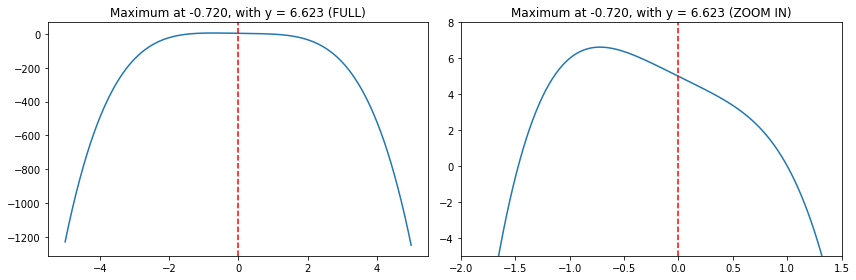

In [5]:
# Plotting the objective function graph and finding out the maximum value position at 
func_figure = plt.figure(figsize=(12, 4))

full = func_figure.add_subplot(1, 2, 1)
plt.plot(inputs, results)
plt.title("Maximum at {:.3f}, with y = {:.3f} (FULL)".format(inputs[argmax(results)], results[argmax(results)]))
plt.axvline(x=x_optima, ls='--', color='red')

zoom = func_figure.add_subplot(1, 2, 2)
plt.plot(inputs, results)
plt.xlim(-2, 1.5) # x-axis limit for matplotlib canvas
plt.ylim(-5, 8) # y-axis limit for matplotlib canvas
plt.title("Maximum at {:.3f}, with y = {:.3f} (ZOOM IN)".format(inputs[argmax(results)], results[argmax(results)]))
plt.axvline(x=x_optima, ls='--', color='red')

plt.tight_layout() # margin adjusted

### Initialize default parameters

In [6]:
# define initial parameters
step_size = .1
temp = 10 
max_iterations = 1000

In [7]:
# list of available colors in Matplotlib
colors = [hex_ for _, hex_ in cl.cnames.items()]

### FUNCTION: Temperature Update

In [8]:
def classical_temperature_update(i, curr_temp, *args):
    return .85 * curr_temp

In [9]:
def logarithmic_temperature_update(i, *args):
    return temp*log(2)/log(i + 1)

In [10]:
def fast_temperature_update(i, *args):
    return temp / float(i + 1)

In [11]:
def timberwolf_temperature_update(i, curr_temp, max):
    return curr_temp * (i/(max/2) * .15 + .8) if i < (max/2) else curr_temp * (0.95 - (i-max/2)/(max/2) * .15)

### FUNCTION: Step Update

In [12]:
def normal_step_update(curr, step_size):
    return curr + randn() * step_size

### FUNCTION: Simulated Annealing

In [13]:
def SimulatedAnnealing(stepFunction, tempFunction, step_size, max_iterations, temp, seeds=40):
    '''update Simulated Annealing function to count how much solution accepted
    params : 
        stepFunction - The function to generate next position 
        tempFunction - Function to update the temperature 
        step_size - Distance parameter for position generation
        max_iterations - Total iterations for simulation
        seeds - Generate pseudorandom numbers from this value'''
    
    seed(seeds)
    
    # Generate random and current position
    best = r_min + rand() * (r_max - r_min) # Start point =  -5.0 + [0,1) * 5.0 - -5.0
    best_val = objective(best)
    curr, curr_val = best, best_val
    t = temp
    history = []
    
    for i in range(max_iterations):
        # Generate candidate position from current position
        cand = stepFunction(curr, step_size)
        cand_val = objective(cand)
        
        # Update the temperature
        t = tempFunction(i, t, max_iterations)

        # If candidate cost is better than current best cost, replace them,
        # replace current position with candidate, and append candidate to history
        if cand_val > best_val:
            history.append(cand)
            best, best_val = cand, cand_val
            curr, curr_val = cand, cand_val
            
        # Else evaluate acceptance probability with Metropolis criterion
        else :
            diff = cand_val - curr_val
            metro = exp(diff/t)

            # If metro value is better than a random uniform distributed number [0,1),
            # replace current position with candidate, and append candidate to history
            if rand() < metro:
                history.append(cand)
                curr, curr_val = cand, cand_val
                
    return history, best, best_val, tempFunction.__name__, stepFunction.__name__, [step_size, max_iterations, temp]

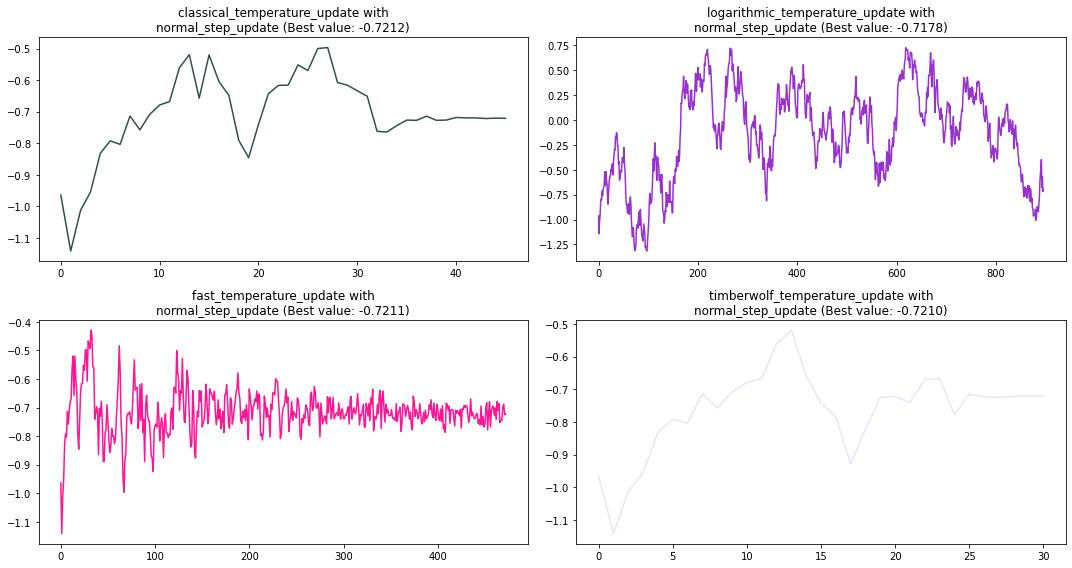

In [14]:
# We search for the maximum position using all four different temperature update function
figure = plt.figure(figsize=(15, 8)) # figsize(width/horizontally, height/vertically)
function_plot = [
    SimulatedAnnealing(normal_step_update, classical_temperature_update, step_size, max_iterations, temp),
    SimulatedAnnealing(normal_step_update, logarithmic_temperature_update, step_size, max_iterations, temp),
    SimulatedAnnealing(normal_step_update, fast_temperature_update, step_size, max_iterations, temp),
    SimulatedAnnealing(normal_step_update, timberwolf_temperature_update, step_size, max_iterations, temp),
]

# Graph the steps taken. The X axes shows how many positions were taken/accepted,
# while the Y axes shows its position at that time
for i, j in enumerate(function_plot):
    a = figure.add_subplot(2, 2, i+1) # position index always starts from 1, thus i+1
    plt.plot(j[0], c=colors[randint(0, len(colors)-1)])
    plt.title(j[3] + " with\n" + j[4] + " (Best value: {:.4f})".format(j[1]))
plt.tight_layout() # margin adjusted

### Fastest Convergence Function Between Classical & Timberwolf

In [15]:
# From previous observation, the best temperature update function seems to be either classical or timberwolf.
# To see which would converge faster, we test them with several different random seeds.
for x in range(5): 
    random = int(rand() * 10000)
    y1 = SimulatedAnnealing(normal_step_update, classical_temperature_update, step_size, max_iterations, temp, random)
    y2 = SimulatedAnnealing(normal_step_update, timberwolf_temperature_update, step_size, max_iterations, temp, random)

    print("> Graph {}".format(x+1))
    print("Classical converge at x = {}".format(len(y1[0])))
    print("Timberwolf converge at x = {}".format(len(y2[0])), end="\n\n")

> Graph 1
Classical converge at x = 43
Timberwolf converge at x = 37

> Graph 2
Classical converge at x = 49
Timberwolf converge at x = 49

> Graph 3
Classical converge at x = 38
Timberwolf converge at x = 32

> Graph 4
Classical converge at x = 52
Timberwolf converge at x = 52

> Graph 5
Classical converge at x = 39
Timberwolf converge at x = 35



### Experiment Playground

In [16]:
# Now we use different parameter modification to see its effect
# We modify each parameter variable at a time
step_size_arr =  [i/1000 for i in range(0, 1050, 50) if i != 0]
temp_arr = [i for i in range(10, 70, 5)]
max_iterations_arr = [i for i in range(500, 10000+1, 500)]

In [17]:
def experiment(choose, arr, st=step_size, it=max_iterations, tm=temp, stepFunc=normal_step_update, tempFunc=timberwolf_temperature_update):
    '''Function to run simulated annealing function multiple times with different values from an array
    params :
        choose - String for selecting the parameter to be tested
        arr - The array to be used for testing'''
    
    if choose == "step_size":
        exp_function_plot = [SimulatedAnnealing(stepFunc, tempFunc, i, it, tm) for i in arr]
        idx = 0
    elif choose == "iter":
        exp_function_plot = [SimulatedAnnealing(stepFunc, tempFunc, st, i, tm) for i in arr]
        idx = 1
    elif choose == "temp":
        exp_function_plot = [SimulatedAnnealing(stepFunc, tempFunc, st, it, i) for i in arr]
        idx = 2
    else:
        raise AttributeError("Available choose options: 'step_size' | 'iter' | 'temp'.")

    result = {}
    plt.figure(figsize=(15, 8)) # figsize(width/horizontally, height/vertically)
    
    for i, j in enumerate(exp_function_plot):
        result[j[5][idx]] = round(j[1], 7)
        plt.plot(j[0], c=colors[randint(0, len(colors)-1)], label="{}".format(j[5][idx]))
        plt.legend()
    
    max_value = max(result, key=result.get)
    plt.title("{} with {}\nExperiment with: {}, best value: {} ({})".format(stepFunc.__name__, tempFunc.__name__, choose, max_value, result[max_value]))
    plt.tight_layout() # margin adjusted
    
    return result

{10: -0.720953,
 15: -0.7210736,
 20: -0.7209909,
 25: -0.7209909,
 30: -0.7209268,
 35: -0.7212297,
 40: -0.7212297,
 45: -0.7212297,
 50: -0.7212297,
 55: -0.7212297,
 60: -0.7212297,
 65: -0.7212297}

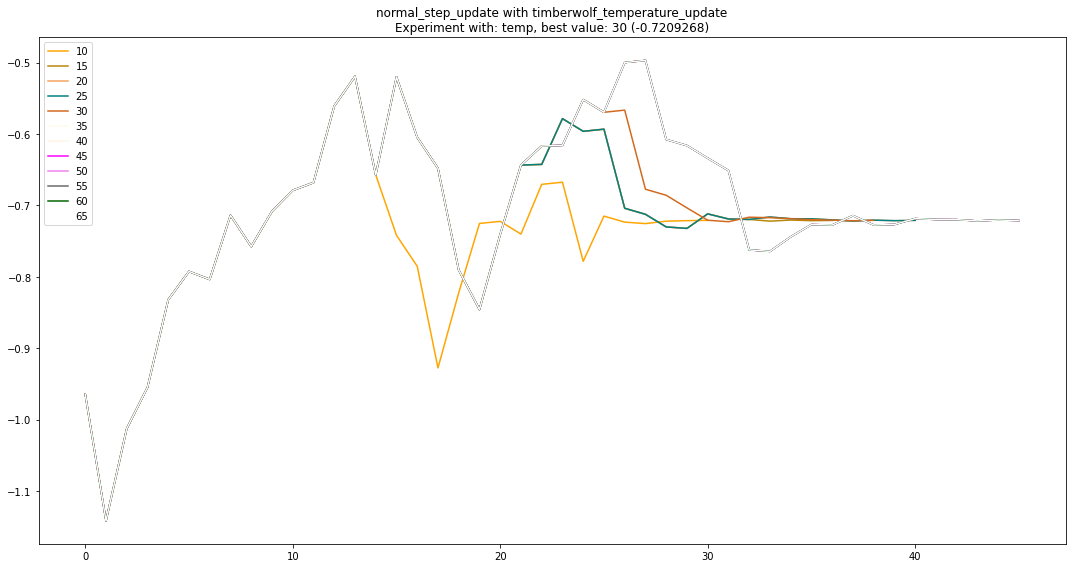

In [18]:
experiment("temp", temp_arr)

{0.05: -0.7209787,
 0.1: -0.720953,
 0.15: -0.7208246,
 0.2: -0.7209376,
 0.25: -0.7215081,
 0.3: -0.7216452,
 0.35: -0.7211902,
 0.4: -0.7207089,
 0.45: -0.7197868,
 0.5: -0.7205476,
 0.55: -0.719633,
 0.6: -0.7215642,
 0.65: -0.7210885,
 0.7: -0.7214444,
 0.75: -0.7216832,
 0.8: -0.7215061,
 0.85: -0.7186277,
 0.9: -0.7211729,
 0.95: -0.7193249,
 1.0: -0.7202881}

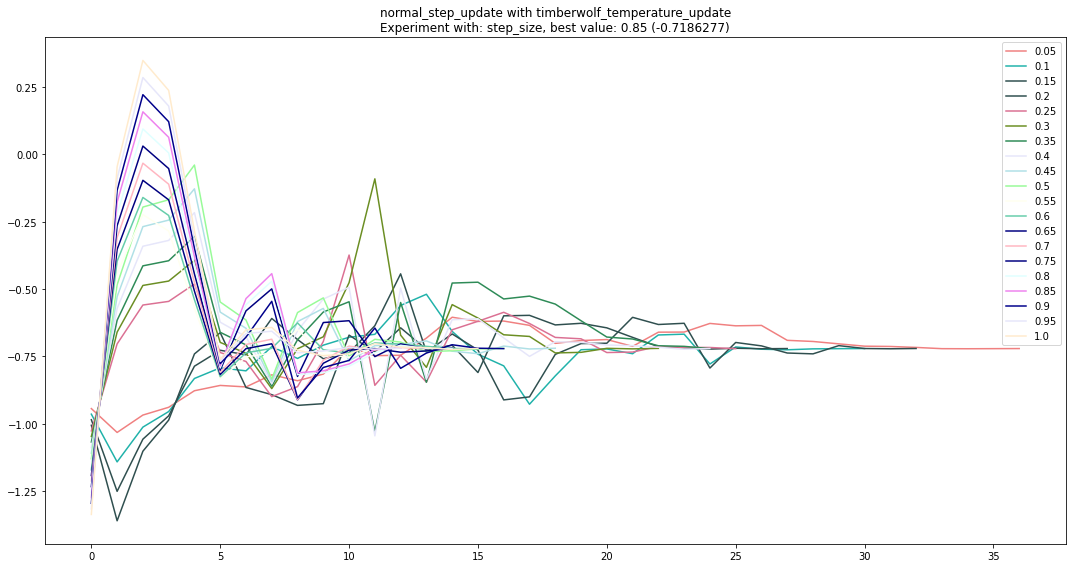

In [19]:
experiment("step_size", step_size_arr)

{500: -0.7213498,
 1000: -0.720953,
 1500: -0.720953,
 2000: -0.7210183,
 2500: -0.7211771,
 3000: -0.7211771,
 3500: -0.7211771,
 4000: -0.7211771,
 4500: -0.7211771,
 5000: -0.7211771,
 5500: -0.7211771,
 6000: -0.7211771,
 6500: -0.7211771,
 7000: -0.7211771,
 7500: -0.7211771,
 8000: -0.7211771,
 8500: -0.7211413,
 9000: -0.7211413,
 9500: -0.7211256,
 10000: -0.7211256}

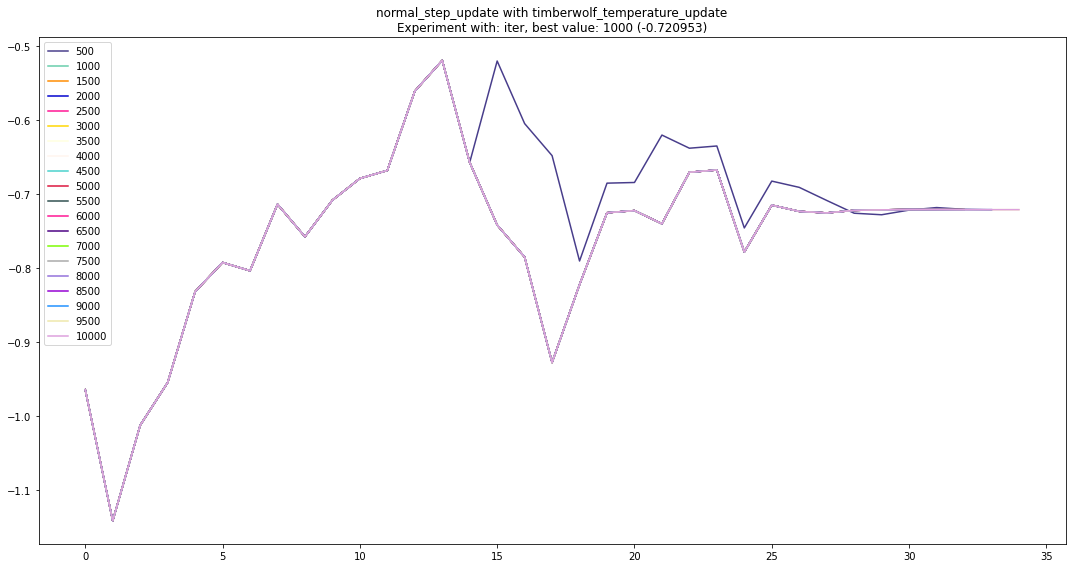

In [20]:
experiment("iter", max_iterations_arr)

Source : [E-book](https://drive.google.com/file/d/1uS5q5J_VepI7ShmRkc6gseGIAxYvskOC/view?usp=sharing)